<a href="https://colab.research.google.com/github/reinaqu/reportingslroo/blob/main/When_business_processes_meets_complex_events_in_logistics_A_mapping_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# When business processes meets complex events in logistics: A mapping study

This notebook contains all the synthesis operations implemented in Python that allows us to generate tables and graphics that are used in the report of the mapping study 


## Environment configuration

Clone the github repository with all the scripts and install the dependencies.


In [4]:
#from getpass import getpass
import os

#os.environ['USER'] = input('Enter the username of your Github account: ')
#os.environ['PASSWORD'] = getpass('Enter the password of your Github account: ')
#os.environ['REPOSITORY'] = input('Enter the name of the Github repository: ')
#os.environ['GITHUB_AUTH'] = os.environ['USER'] + ':' + os.environ['PASSWORD']
#!rm -rf $REPOSITORY # To remove the previous clone of the Github repository
#!git clone https://$GITHUB_AUTH@github.com/$USER/$REPOSITORY.git
#os.environ['USER'] = os.environ['PASSWORD'] = os.environ['REPOSITORY'] = os.environ['GITHUB_AUTH'] = ""
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd /content/drive/

os.environ['REPOSITORY'] ='reportingslroo'
os.environ['USER'] = 'reinaqu'
!dir $REPOSITORY
!rm -rf $REPOSITORY # To remove the previous clone of the Github repository
#! git clone https://github.com/reinaqu/reportingslr.git
!git clone https://github.com/$USER/$REPOSITORY.git
!pip install --upgrade geopandas
!pip install pandas==1.1.1
!pip install matplotlib==3.3.1
!pip install bibtexparser
!pip install plotnine
import sys
sys.path.append('reportingslroo')
sys.path.append('reportingslroo/src/')
sys.path.append('reportingslroo/data/')

data  README.md  src
Cloning into 'reportingslroo'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 355 (delta 214), reused 197 (delta 59), pack-reused 0
Receiving objects: 100% (355/355), 16.25 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (214/214), done.


In [5]:
import configurations
import Publications as pub
import PublicationsQuality as pubq
import Dashboard as dashbd
import DashboardLatex as dashbdlat
import Authors as auth
import Venues as ven
import DataExtraction as datext
import DashboardDataExtraction as datextdash
import pandas as pd
import test_utils

FULL_REPORT_FILE="reportingslroo/data/report.v.0.2.54-all.xls"
REPORT_FILE="reportingslroo/data/report.v.0.2.54.xls"
AUTHORS_INPUT_FILE ="reportingslroo/data/all-authors-2.0.xlsx"
VENUES_INPUT_FILE ="reportingslroo/data/all-venues-2.0.xlsx"
CITATION_INPUT_FILE="reportingslroo/data/citations_per_paper-2.0.xlsx"
MAP_FILE='reportingslroo/data/countries.geojson'
pd.__version__

'1.1.1'

## Data synthesis and results

First, we have to create all the objects needed for doing synthesis.

In [6]:
#Objects creation for invoking the different operations
#Create a pair of objects for managing the whole set of recovered studies
publ_full = pub.Publications.of_excel(FULL_REPORT_FILE,configurations.config_publ)
db_full = dashbd.Dashboard.of(publ_full)

#Create a pair of objects for managing the set of selected publications
publ = pub.Publications.of_excel(REPORT_FILE,configurations.config_publ)
db = dashbd.Dashboard.of(publ)
#Create a dashboard object specific for latex generation
dblat = dashbdlat.DashboardLatex.of(publ)
#Create object for venues
venues= ven.Venues.of_excel(VENUES_INPUT_FILE, configurations.config_venues)
dblat.set_venues(venues) #add the venues to the Latex dashboard

#Create a pair of objects for managing the extracted data
data_df = datext.DataExtraction.of_excel(REPORT_FILE,configurations.config_data_extraction)
datadash = datextdash.DashboardDataExtraction.of(data_df)


INFO:root:Loaded dataframe from reportingslroo/data/report.v.0.2.54.xls with 145 rows


### Studies Quality
We evaluate the quality of selected study by applying a data information quality framework. Studies quality is measured according to two dimensions: Intrisic and Contextual Information Quality.

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


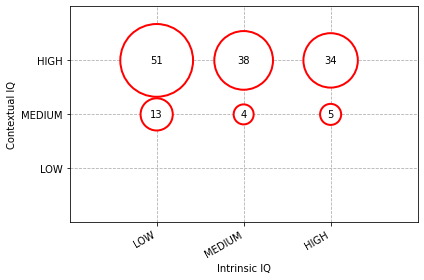

  Intrinsic IQ Contextual IQ  number of studies
0         HIGH          HIGH                 34
1         HIGH        MEDIUM                  5
2          LOW          HIGH                 51
3          LOW        MEDIUM                 13
4       MEDIUM          HIGH                 38
5       MEDIUM        MEDIUM                  4


In [7]:
pub_quality = pubq.PublicationsQuality.of_excel(REPORT_FILE, configurations.config_publ)  
datadash.set_publications_quality(pub_quality)
datadash.create_bubble_quality()
print(datadash.get_publications_quality.count_pairs_per_quality_measure)

### Studies per datasource
Counts the number of primary studies recovered from the different data sources. 




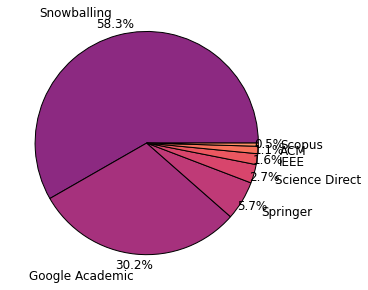

datasource
Snowballing        4195
Google Academic    2177
Springer            408
Science Direct      195
IEEE                113
ACM                  77
Scopus               33
Name: number of studies, dtype: int64


In [8]:
db_full.create_piechart_studies_by_datasource
print(publ_full.count_studies_per_datasource)


### Selected publication per type
Counts the number of selected primary studies per type of publication (conference, journal, worksnop,...)

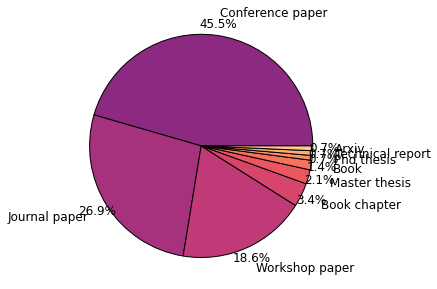

type
Conference paper    66
Journal paper       39
Workshop paper      27
Book chapter         5
Master thesis        3
Book                 2
Phd thesis           1
Technical report     1
Arxiv                1
Name: number of studies, dtype: int64


In [9]:
  db.create_piechart_studies_by_type
  print(publ.count_studies_by_type)
  

### RQ1. What are the demographics of the published studies?
This research question help to identify the quantity and frequency of publications, the top researchers in the area, the top countries, the most influential studies and the top venues.

#### RQ1.1. Which contributions were made over the years?
To answer this research question we need to count the number of selected studies by year.

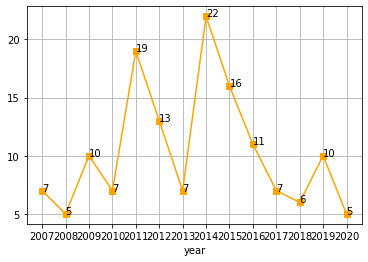

year
2007     7
2008     5
2009    10
2010     7
2011    19
2012    13
2013     7
2014    22
2015    16
2016    11
2017     7
2018     6
2019    10
2020     5
Name: number of studies, dtype: int64


In [10]:
db.create_plot_studies_by_year
print(publ.count_studies_by_year)


#### RQ1.2. Which  are  the  top  researchers  in  the  area and where are they from?
To answer this question we have to count the number of studies per author, and the number of studies per country. Note that one studies can have various authors and each author belongs to an institution placed in one country. As a consequence, the countries of origin of one primary study have been determined by the country of the institutions of the authors of the papers.

        Author name  number of studies
0     Mathias Weske                 12
1    Anne Baumgrass                  9
2        Hyerim Bae                  6
3      Jan Mendling                  6
4       Martin Roth                  6
..              ...                ...
338  Yong-Shin Kang                  1
339    Yuchen Jiang                  1
340      Yunjia Liu                  1
341  Zineb Lamghari                  1
342    Zsolt Kemény                  1

[343 rows x 2 columns]
     Paper ID                   Country
0           0                   Germany
1           0                   Germany
2           0                   Germany
3           4                    France
4           4                    France
..        ...                       ...
511    558969                    France
512    558969                    France
513    558969                    France
514    559078  United States of America
515    559078  United States of America

[516 rows x 2 columns]
    

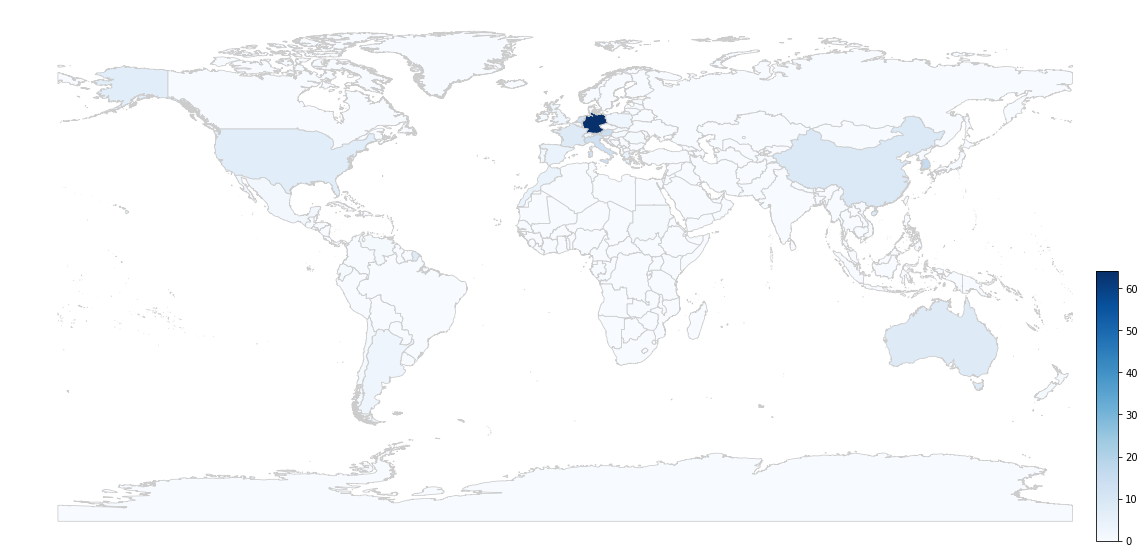

In [11]:
#Create object to store information about authors
authors = auth.Authors.of_excel(AUTHORS_INPUT_FILE, configurations.config_auth)
#Count the number of selected studies per authors
authors_count_df = authors.count_number_of_studies_per_author
print(authors_count_df)

#Count the number of studies per country
countries_count_df = authors.count_number_of_studies_per_country
db.set_authors(authors) # Store the information about authors in the dashboard
db.set_geojson_file(MAP_FILE)
db.create_map_countries  # Create a map with the information about the countries


#### RQ1.3.  Which are the most influential studies in the area?
To answer this question we have to order the studies by the number of citations. We have obtained the number of citations from Google Scholar and from Scopus. As a consenquence, the list of resulting studies is ordered by the number of citations in Google Scholar, and then by the number of citations in Scopus.

In [12]:
 publ.set_citations_dataframe_from_excel(CITATION_INPUT_FILE, ['GoogleScholar','Scopus'])
 print(publ.citation_df)
 dblat.generate_citations(['GoogleScholar','Scopus'])


     ID Paper  ... Citations-Scopus
0      374576  ...              108
1        2673  ...               88
2      265374  ...               40
3        3071  ...               78
4      237136  ...               45
..        ...  ...              ...
140      2053  ...                0
141      2721  ...                0
142    507928  ...                0
143     14145  ...                0
144      2195  ...                0

[145 rows x 4 columns]
1 & \cite{374576} & \textsf{Event correlation for process discovery from web service interaction logs} & 171 & 108\\
2 & \cite{2673} & \textsf{Monitoring business constraints with the event calculus} & 119 & 88\\
3 & \cite{265374} & \textsf{Event-driven rules for sensing and responding to business situations} & 109 & 40\\
4 & \cite{3071} & \textsf{IoT-enabled real-time production performance analysis and exception diagnosis model} & 92 & 78\\
5 & \cite{237136} & \textsf{Beyond process monitoring: a proof-of-concept of event-driven busines

#### RQ1.4. Which are the top venues?
To answer this question we have to count the number of selected studies per venue. As workshops that are hold with conferences may vary in different conference editions, they are grouped as a unique venue. For example, workshops hold with BPM conference are grouped as BPM Workshops.

In [13]:
venues_count_df = venues.count_number_of_studies_per_venue
pd.set_option("display.max_rows", 10, "display.max_columns", None)
print(venues_count_df)

                                    Venue                   Type  \
0   Business Process Management Workshops               Workshop   
1                              Inf. Syst.                journal   
2                                     BPM             conference   
3                 Bus. Process. Manag. J.                journal   
4                            Comput. Ind.                journal   
..                                    ...                    ...   
94                                 MW4SOC               Workshop   
95                          OTM Workshops               Workshop   
96                           RFID SysTech               Workshop   
97                                 WETICE               Workshop   
98                                   CoRR  Informal Publications   

    number of studies  
0                   9  
1                   4  
2                   4  
3                   3  
4                   3  
..                ...  
94             

In [14]:
#Generate venues to be included in a latex table
dblat.generate_venues() 

1 & Business Process Management Workshops & Workshop & 9 \\ 
2 & Inf. Syst. & journal & 4 \\ 
3 & BPM & conference & 4 \\ 
4 & Bus. Process. Manag. J. & journal & 3 \\ 
5 & Comput. Ind. & journal & 3 \\ 
6 & EDOC Workshops & Workshop & 3 \\ 
7 & Comput. Ind. Eng. & journal & 2 \\ 
8 & Expert Syst. Appl. & journal & 2 \\ 
9 & BIS & conference & 2 \\ 
10 & CAiSE & conference & 2 \\ 
11 & DEBS & conference & 2 \\ 
12 & EDOC & conference & 2 \\ 
13 & ICSOC & conference & 2 \\ 
14 & IEOM & conference & 2 \\ 
15 & LDIC & conference & 2 \\ 
16 & OTM Conferences & conference & 2 \\ 
17 & SEMANTICS & conference & 2 \\ 
18 & SRII Global Conference & conference & 2 \\ 
19 & EMISA & Workshop & 2 \\ 
20 & Ph.D. Retreat of the HPI Research School on Service-oriented Systems Engineering & Workshop & 2 \\ 
21 & ACM Trans. Intell. Syst. Technol. & journal & 1 \\ 
22 & Advanced Manufacturing Technology & journal & 1 \\ 
23 & Advances in Software & journal & 1 \\ 
24 & Bus. Inf. Syst. Eng. & journal & 1 

### RQ2. What are the current trends in the area?
This research question helps to identify the nature of the existing work in the area. We have broken this question down into different secondary questions.

#### RQ2.1. What is the type of contribution made by the study?
To answer this question we have to count the number of studies per type of contribution (framework, method, language, model, ...). It deserves to be notice that one study can provide more than one type of contribution. We have depicted the number of studies per type of contribution in a barchart, and also the number of studies per type of contribution and year in a bubble chart.

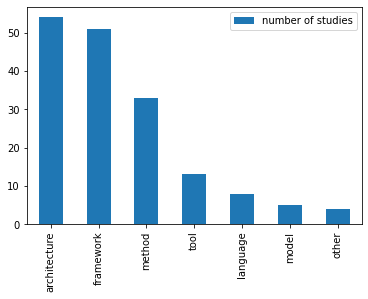

ContributionType
architecture    54
framework       51
method          33
tool            13
language         8
model            5
other            4
Name: number of studies, dtype: int64


In [15]:
datadash.create_bar_count_multivalued_column("ContributionType")
print(datadash.get_data.count_multivalued_column("ContributionType"))     


List of studies per type of contribution.

In [16]:
test_utils.show_dict_from_multivalued_column(datadash, "ContributionType")

architecture --> [4, 6, 98, 100, 110, 128, 133, 1894, 1901, 1909, 1913, 1918, 1930, 1936, 1941, 1971, 1990, 2007, 2014, 2017, 2021, 2028, 2051, 2052, 2053, 2058, 2076, 2096, 2127, 2131, 2142, 2276, 2277, 2557, 2596, 2765, 2816, 2866, 2904, 2932, 2964, 2985, 3071, 13621, 14145, 14777, 237068, 237136, 265248, 296393, 507542, 507613, 507928, 558969]
framework --> [4, 104, 107, 108, 109, 118, 128, 129, 139, 178, 189, 245, 248, 1906, 1909, 1926, 1942, 1967, 1969, 1978, 2001, 2003, 2009, 2023, 2035, 2040, 2054, 2094, 2095, 2106, 2108, 2124, 2130, 2227, 2351, 2574, 2605, 2673, 2694, 2720, 2849, 2921, 2923, 13649, 13682, 13717, 14136, 14356, 265471, 296369, 471320]
language --> [10, 166, 205, 1941, 2019, 2392, 2811, 265374]
method --> [0, 18, 98, 102, 103, 106, 112, 113, 150, 271, 1934, 1967, 1971, 2021, 2039, 2105, 2252, 2557, 2565, 2586, 2709, 2721, 2728, 2731, 2751, 2907, 2964, 14098, 296393, 296444, 296464, 374576, 507986]
model --> [10, 124, 166, 2019, 2195]
other --> [97, 101, 110, 2265]

Studies per type of contribution and year.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


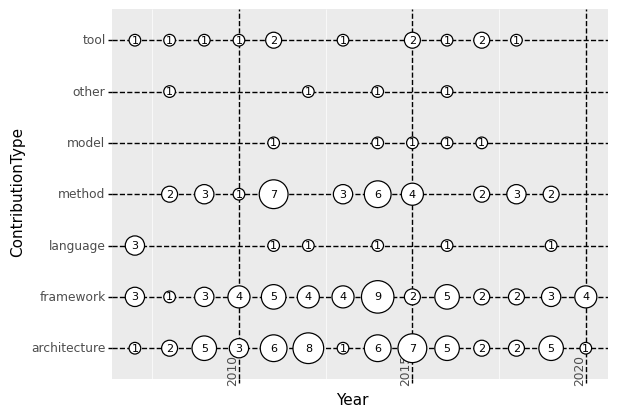

<ggplot: (8765731468321)>


In [17]:
incl_list= ['architecture', 'framework', 'method','tool', 'language','model','other']
datadash.create_bubble_multivalued_single("ContributionType", 'year', incl_list)

Properties of the studies that propose architectures, frameworks and/or tools.

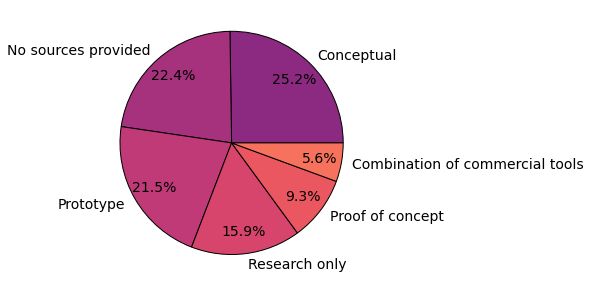

State-framework-tool-architecture
n/a                                34
Conceptual                         27
No sources provided                24
Prototype                          23
Research only                      17
Proof of concept                   10
Combination of commercial tools     6
undetermined                        4
Name: number of studies, dtype: int64


In [18]:
datadash.create_piechart_count_multivalued_column("State-framework-tool-architecture", \
                                                      exclude=['undetermined', 'n/a'])

print(datadash.get_data.count_multivalued_column("State-framework-tool-architecture"))   

#### RQ2.2. Which are the application areas of the approaches?

To answer this question we have to count the number of applications area per study. It deserves to be noticed that one study could be related to more than one domain.

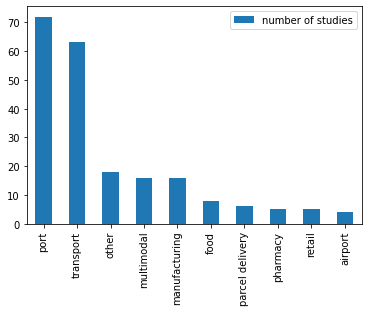

     ID Paper        Domain
0           0          food
1           4          port
2           4     transport
3           6          port
4           6       airport
..        ...           ...
229    507613          port
230    507928          port
231    507928    multimodal
232    507986        retail
233    558969  undetermined

[234 rows x 2 columns]


In [20]:
datadash.create_bar_count_multivalued_column("Domain",exclude=['undetermined'])
domain_df=data_df.get_multivalued_column("Domain")
print(domain_df)


List of studies per area of application

In [21]:
test_utils.show_dict_from_multivalued_column(datadash, "Domain")

airport --> [6, 128, 2131, 2586]
food --> [0, 2009, 2054, 2058, 2106, 2586, 14145, 296444]
manufacturing --> [109, 110, 1901, 1918, 1926, 1942, 2001, 2017, 2023, 2227, 2849, 3071, 13621, 14777, 265248, 265471]
multimodal --> [18, 101, 124, 129, 1906, 2007, 2040, 2094, 2096, 2127, 2131, 2811, 13682, 13717, 237136, 507928]
other --> [118, 166, 1967, 2014, 2019, 2052, 2053, 2108, 2277, 2574, 2694, 2765, 2932, 2964, 13649, 14098, 14136, 374576]
parcel delivery --> [104, 2392, 2605, 2985, 265374, 296393]
pharmacy --> [10, 1990, 2728, 2731, 2923]
port --> [4, 6, 98, 100, 106, 107, 108, 112, 113, 124, 128, 129, 133, 139, 150, 205, 271, 1894, 1913, 1934, 1941, 1969, 1971, 1978, 1992, 2001, 2014, 2023, 2028, 2035, 2040, 2051, 2054, 2076, 2094, 2096, 2106, 2124, 2127, 2130, 2131, 2142, 2195, 2227, 2252, 2265, 2276, 2277, 2344, 2351, 2392, 2565, 2566, 2586, 2596, 2673, 2720, 2721, 2751, 2816, 2907, 2921, 2932, 2996, 14136, 14145, 14356, 14777, 237068, 296464, 507613, 507928]
retail --> [103, 1909

#### RQ2.3. How is logistics covered in the studies?
To answer this question we have to count the number of studies per logistic coverage.

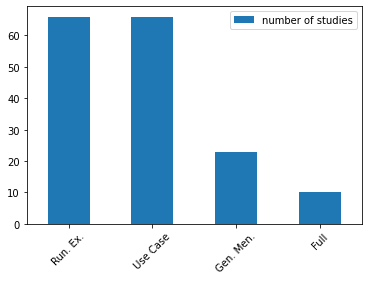

Logistics coverage
motivating/running example      66
use case                        66
general mention in the paper    23
full                            10
Name: number of studies, dtype: int64


In [22]:
dict_log_cov_translation={'use case':'Use Case',\
                              'motivating/running example':'Run. Ex.',\
                              'general mention in the paper':'Gen. Men.',\
                              'full':'Full',\
                              'undetermined':'Undet.'\
                      }
datadash.create_bar_count_multivalued_column("Logistics coverage", rotation=45,translation=dict_log_cov_translation)
logistic_coverage_df=data_df.get_multivalued_column("Logistics coverage")
print(data_df.count_multivalued_column("Logistics coverage"))

List of studies per logistic coverage

In [23]:
test_utils.show_dict_from_multivalued_column(datadash, "Logistics coverage")

full --> [245, 2051, 2052, 2105, 2866, 13621, 13649, 237068, 265248, 558969]
general mention in the paper --> [6, 97, 128, 166, 189, 1936, 1942, 1990, 2003, 2095, 2277, 2557, 2569, 2574, 2709, 2811, 2849, 2904, 2964, 14777, 296369, 471320, 507542]
motivating/running example --> [0, 4, 18, 98, 100, 102, 103, 104, 108, 109, 118, 133, 139, 178, 205, 248, 1913, 1918, 1926, 1930, 1967, 1969, 1978, 1990, 1992, 2001, 2007, 2009, 2017, 2023, 2028, 2035, 2039, 2040, 2053, 2076, 2094, 2106, 2124, 2127, 2130, 2227, 2252, 2276, 2344, 2392, 2566, 2596, 2605, 2673, 2720, 2731, 2751, 13682, 13717, 14136, 14145, 14356, 265248, 265374, 265471, 296393, 296444, 374576, 507613, 507986]
use case --> [10, 101, 106, 107, 110, 112, 113, 124, 129, 133, 150, 271, 1894, 1901, 1906, 1909, 1913, 1918, 1934, 1941, 1971, 2007, 2014, 2019, 2021, 2040, 2053, 2054, 2058, 2076, 2094, 2096, 2108, 2127, 2131, 2142, 2195, 2227, 2252, 2265, 2344, 2351, 2565, 2566, 2586, 2673, 2694, 2720, 2721, 2728, 2765, 2816, 2907, 2921, 

#### RQ2.4. What type and which business process modelling languages are utilised?
The rationale behind this question is to classify and identify the business process modelling languages utilised in the different studies. Each language has been classified according to its imperative or declarative nature. Note that one study can be classified as imperative and declarative if presents languages in of both styles.

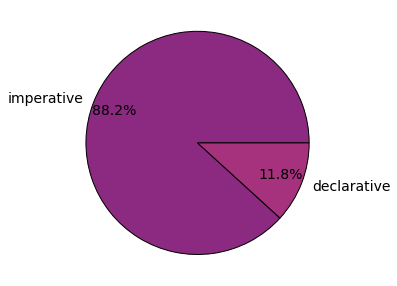

Modelling language type
imperative      105
undetermined     27
declarative      14
Name: number of studies, dtype: int64


In [24]:
datadash.create_piechart_count_multivalued_column("Modelling language type", exclude=['undetermined'])
print(datadash.get_data.count_multivalued_column("Modelling language type"))


Regarding business process modelling languages, we have extracted the different languages from studies.

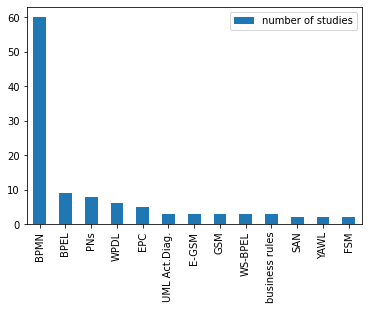

Modelling language
BPMN                                           60
undetermined                                   32
BPEL                                            9
Petri Nets                                      8
WPDL (Workflow Process Definition Language)     6
                                               ..
Adaptive Dynamic Bayesian Network               1
vBPMN                                           1
EDT (Event Derivation Table)                    1
QPNs (Quequeing Petri Nets)                     1
Functional model                                1
Name: number of studies, Length: 42, dtype: int64


In [25]:
dict_ml={"Petri Nets":"PNs",\
             "SAN (Situation-Action-Network)":"SAN",\
             "FSM (Finite State Machine)":"FSM",\
             "WPDL (Workflow Process Definition Language)":"WPDL",\
             "EPC (Event Driven Process Chain)":"EPC",\
             "GSM (Guard-Stage-Milestone)":"GSM",\
             "UML Activity Diagram":"UML Act.Diag."
             }
datadash.create_bar_count_single_column_with_multiple_values("Modelling language", translation=dict_ml, exclude=['undetermined'], count_inferior_limit=1)    
print(datadash.get_data.count_single_column_with_multiple_values("Modelling language"))


#### RQ2.5. What type and which event processing languages are utilised?
The rationale behind this question is to classify and identify the event processing languages utilised in the different studies. Each language has been classified according to the five language styles for CEP: languages based on composition operators, data stream query languages, production rules, timed state machines, logic languages and hybrid approaches.

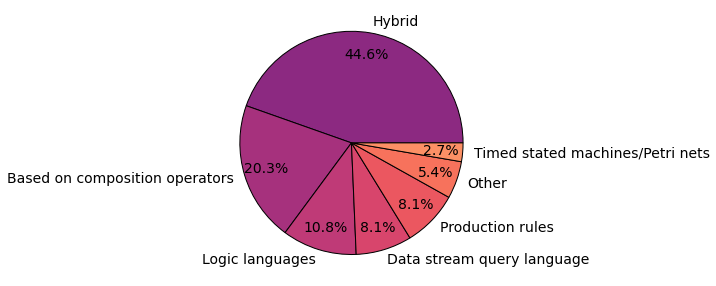

Event Processing Language Style
N/A                                 71
Hybrid                              33
Based on composition operators      15
Logic languages                      8
Data stream query language           6
Production rules                     6
Other                                4
Timed stated machines/Petri nets     2
Name: number of studies, dtype: int64


In [26]:
datadash.create_piechart_count_multivalued_column("Event Processing Language Style", exclude=['undetermined', 'N/A'])
print(datadash.get_data.count_single_column_with_multiple_values("Event Processing Language Style"))


Regarding the event processing languages (EPLs), we have extracted the different EPLs from studies.

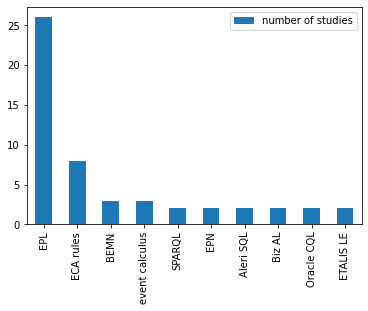

Event processing Language
undetermined                                69
EPL (Esper Event Processing Language)       26
ECA rules                                    8
BEMN (Business Event Modeling Notation)      3
event calculus                               3
                                            ..
Propietary composition operator based        1
XML                                          1
SCEP (Semantic Complex Event Processing)     1
BPMN extension                               1
Eventlet                                     1
Name: number of studies, Length: 39, dtype: int64


In [27]:
dict_epl={"Petri Nets":"PNs",\
             "EPL (Esper Event Processing Language)":"EPL",\
             "BEMN (Business Event Modeling Notation)":"BEMN",\
             "Biz AL (Business Aware Language)":"Biz AL",\
             "EPN (Event Processing Network)":"EPN",\
             "ETALIS Language for Events":"ETALIS LE"
             }
    
datadash.create_bar_count_single_column_with_multiple_values("Event processing Language", translation=dict_epl, exclude=['undetermined'], count_inferior_limit=1)
print(datadash.get_data.count_single_column_with_multiple_values("Event processing Language"))

#### RQ2.6. Which are the event producers?

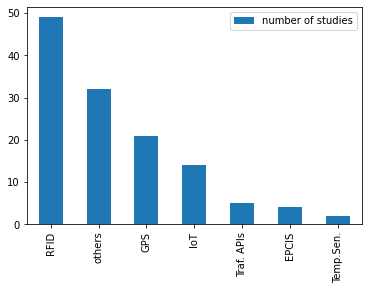

Technology of event producer
undetermined               54
RFID                       49
others                     32
GPS                        21
IoT                        14
public APIs for traffic     5
EPCIS standard              4
temperature sensors         2
Name: number of studies, dtype: int64


In [28]:
dict_evpr={"wireless sensor networks (WSN)":"WSN",\
           "public APIs for traffic":"Traf. APIs", \
           "EPCIS standard":"EPCIS",\
           "temperature sensors":"Temp.Sen."}

datadash.create_bar_count_multivalued_column("Technology of event producer",  translation=dict_evpr, exclude=['undetermined'])

print(datadash.get_data.count_multivalued_column("Technology of event producer"))

     

Studies per event producers

In [29]:
test_utils.show_dict_from_multivalued_column(datadash, "Technology of event producer")

EPCIS standard --> [18, 2014, 2557, 471320]
GPS --> [4, 98, 101, 112, 124, 129, 133, 1909, 1918, 1971, 2039, 2054, 2058, 2094, 2127, 2142, 2227, 2566, 2816, 13621, 14136]
IoT --> [107, 110, 139, 1936, 1971, 2054, 2076, 2095, 2344, 2694, 2866, 3071, 13621, 14777]
RFID --> [10, 101, 102, 109, 118, 128, 129, 245, 1894, 1901, 1906, 1909, 1918, 1930, 1942, 2001, 2003, 2007, 2009, 2014, 2019, 2021, 2039, 2054, 2058, 2094, 2105, 2106, 2108, 2142, 2195, 2265, 2557, 2565, 2569, 2574, 2586, 2605, 2709, 2904, 2921, 2964, 3071, 13621, 13682, 265471, 296393, 296444, 507613]
others --> [106, 108, 133, 1909, 1913, 1926, 1936, 1967, 1971, 2017, 2023, 2040, 2053, 2054, 2058, 2076, 2106, 2227, 2252, 2344, 2596, 2673, 2765, 2921, 13682, 13717, 14098, 237136, 265248, 296393, 507613, 558969]
public APIs for traffic --> [101, 1909, 2040, 2142, 14356]
temperature sensors --> [4, 2021]
undetermined --> [0, 6, 97, 100, 103, 104, 113, 150, 166, 178, 189, 205, 248, 271, 1934, 1941, 1969, 1978, 1990, 1992, 2028, 

### RQ3. What are the potential gaps in the area?
This research question helps to identify potential gaps in the area. As we have broken this question down into different secondary questions.

#### RQ3.1.Is event-driven business process treated in every phase of the process life cycle in a logistic context?
To answer this question we have to count the number of studies per process life cycle phase.

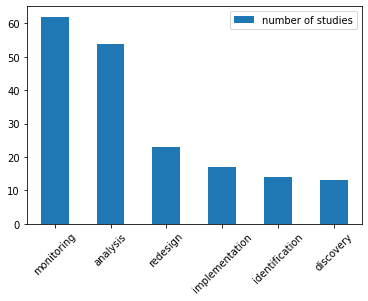

Process lifecycle phase
process monitoring        62
process analysis          54
process redesign          23
process implementation    17
process identification    14
process discovery         13
Name: number of studies, dtype: int64


In [30]:
dict_plc_translation={'process monitoring':'monitoring',\
                       'process identification': 'identification',\
                       'process analysis' : 'analysis',\
                       'process redesign':'redesign',\
                       'process discovery':'discovery',\
                       'process implementation':'implementation',\
                       'undetermined':'undetermined'
                       }      
datadash.create_bar_count_multivalued_column("Process lifecycle phase", rotation=45, translation = dict_plc_translation)

print(datadash.get_data.count_multivalued_column("Process lifecycle phase"))

Studies per process life cycle phase

In [31]:
test_utils.show_dict_from_multivalued_column(datadash, "Process lifecycle phase")

process analysis --> [0, 4, 106, 113, 124, 129, 1901, 1918, 1936, 1941, 1942, 1967, 1971, 1978, 1990, 1992, 2003, 2009, 2035, 2039, 2040, 2051, 2053, 2094, 2105, 2106, 2124, 2127, 2142, 2227, 2276, 2566, 2574, 2605, 2673, 2694, 2709, 2720, 2728, 2751, 2816, 2849, 2932, 3071, 13621, 13717, 14145, 14777, 237136, 296369, 296464, 507542, 507613, 507928]
process discovery --> [178, 271, 1934, 1967, 2028, 2053, 2565, 2720, 2721, 14098, 296444, 374576, 507986]
process identification --> [18, 1906, 1926, 1930, 1967, 1978, 2252, 2811, 13649, 13682, 14136, 14145, 265374, 471320]
process implementation --> [107, 118, 124, 166, 1906, 1930, 1967, 2021, 2052, 2054, 2265, 2344, 2557, 2569, 2765, 2904, 13682]
process monitoring --> [4, 6, 10, 97, 98, 100, 101, 102, 103, 104, 108, 109, 110, 112, 113, 129, 133, 189, 248, 1894, 1901, 1909, 1918, 1942, 1967, 1969, 1978, 2009, 2014, 2035, 2058, 2076, 2094, 2095, 2096, 2106, 2108, 2127, 2130, 2131, 2142, 2227, 2276, 2277, 2351, 2596, 2673, 2866, 2921, 2923,

Furthermore, we have classified the studies per process lyfe cycle phase and year.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


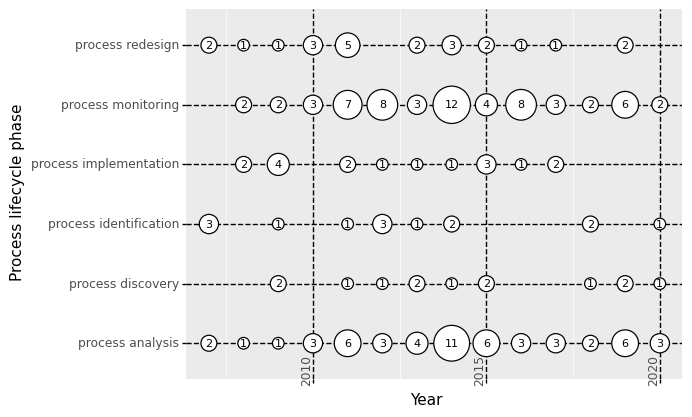

<ggplot: (8765720002689)>


In [33]:
incl_list= list(dict_plc_translation.keys()-{'undetermined'})
datadash.create_bubble_multivalued_single("Process lifecycle phase", 'year', incl_list)

#### RQ3.2.What are the challenges taken off in the field?
The rationale behind this question is to identify which of the challenges in the area have been face up to.

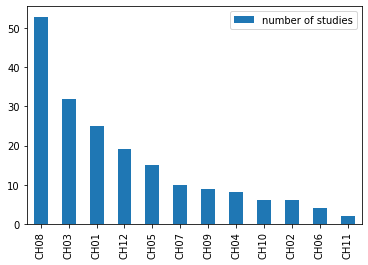

challenge
integrated platforms for BPM & CEP               53
automatic event-based monitoring of processes    32
event models for BPM                             25
from event streams to process models and back    19
choreographies&inter-process correlation         15
                                                 ..
patterns and models for communication             8
optimisation opportunities                        6
compliance& audit& privacy& security              6
abstraction levels                                4
event data quality                                2
Name: number of studies, Length: 12, dtype: int64


In [35]:
dict_translation={'event models for BPM':'CH01',\
                      'compliance& audit& privacy& security': 'CH02',\
                      'automatic event-based monitoring of processes' : 'CH03',\
                      'patterns and models for communication':'CH04',\
                      'choreographies&inter-process correlation':'CH05',\
                      'abstraction levels':'CH06',\
                      'context in events and processes':'CH07',\
                      'integrated platforms for BPM & CEP':'CH08',\
                      '(highly) distributed processes & the role of events':'CH09',\
                      'optimisation opportunities':'CH10',\
                      'event data quality':'CH11',\
                      'from event streams to process models and back':'CH12',\
                      'other':'CH13',\
                      'undetermined':'undetermined'
                      }   
datadash.create_bar_count_multivalued_column("challenge", translation=dict_translation)

challenge_count_df= datadash.get_data.count_multivalued_column("challenge")
print(challenge_count_df)

Study per challenge

In [36]:
 test_utils.show_dict_from_multivalued_column(datadash, "challenge")

(highly) distributed processes & the role of events --> [100, 1901, 1942, 2028, 2058, 2124, 2131, 2344, 2932]
abstraction levels --> [107, 271, 1934, 13717]
automatic event-based monitoring of processes --> [0, 4, 101, 104, 108, 110, 113, 129, 133, 248, 1894, 1918, 1941, 1967, 1969, 1990, 2014, 2039, 2095, 2096, 2130, 2131, 2142, 2276, 2351, 2574, 2849, 2923, 2996, 237136, 265248, 507928]
choreographies&inter-process correlation --> [6, 97, 102, 106, 1930, 2014, 2054, 2131, 2586, 2596, 2728, 2731, 296393, 507986, 558969]
compliance& audit& privacy& security --> [103, 178, 2124, 2751, 2866, 14136]
context in events and processes --> [98, 1909, 1936, 1942, 2035, 2076, 2127, 2195, 2276, 2985]
event data quality --> [2694, 2985]
event models for BPM --> [10, 107, 118, 166, 205, 245, 1906, 1992, 2019, 2021, 2094, 2105, 2106, 2108, 2130, 2252, 2392, 2565, 2673, 2811, 14098, 14777, 265374, 374576, 471320]
from event streams to process models and back --> [97, 139, 1971, 1978, 1992, 2003, 2051